In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# _______________________________________
path = '/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_playground_feb/Datas/'
# Kernels Data (Public Score & File Path)

dfk = pd.DataFrame({ 
    'Kernel ID': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'X'],  
    'Score':     [ 0.84352, 0.84318, 0.84310, 0.84303, 0.84266, 0.84251, 0.84245, 0.84243, 0.84233, 0.84229, 0.84221, 0.84220, 0.84209, 0.84207, 0.84206, 0.84202, 0.84200, 0.84199, 0.84198, 0.84193, 0.84190, 0.84184],   
    'File Path': [path + 'FEB84352.csv', path + 'FEB84318.csv', path + 'FEB84310.csv',
                  path + 'FEB84303.csv', path + 'FEB84266.csv', path + 'FEB84251.csv', path + 'FEB84245.csv', path + 'FEB84243.csv',
                  path + 'FEB84233.csv' , path + 'FEB84229.csv', path + 'FEB84221.csv', path + 'FEB84220.csv', path + 'FEB84209.csv',
                  path + 'FEB84207.csv', path +'FEB84206.csv', path + 'FEB84202.csv', path + 'FEB84200.csv', path + 'FEB84199.csv',
                  path + 'FEB84198.csv', path + 'FEB84193.csv', path + 'FEB84190.csv', path + 'FEB84184.csv']     
})    
    
dfk   

,Kernel ID,Score,File Path
0,A,0.84352,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
1,B,0.84318,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
2,C,0.84310,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
3,D,0.84303,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
4,E,0.84266,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
5,F,0.84251,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
6,G,0.84245,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
7,H,0.84243,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
8,I,0.84233,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
9,J,0.84229,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...


In [ ]:
def generate(main, support, coeff):
    
    g = main.copy()    
    for i in main.columns[1:]:
        
        res = []
        lm, Is = [], []        
        lm = main[i].tolist()
        ls = support[i].tolist()  
        
        for j in range(len(main)):
            res.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))            
        g[i] = res
        
    return g

In [ ]:
def drawing(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> support\n')           
    plt.scatter(X, Y1, s=0.1)
    plt.show() 
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> generated\n')           
    plt.scatter(X, Y2, s=0.1)
    plt.show()  

In [ ]:
def drawing1(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nBlue | X axis >> main | Y axis >> support\n\nOrange | X axis >> main | Y axis >> generated\n') 
    
    plt.scatter(X, Y1, s=0.1)    
    plt.scatter(X, Y2, s=0.1)
    
    plt.show() 

In [ ]:
def drawing2(pxy, mxy):
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - smaller result)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(pxy[0], pxy[1], s=0.1)
    plt.scatter(pxy[0], pxy[2], s=0.1)
    plt.show() 

    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - bigger results)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(mxy[0], mxy[1], s=0.1)
    plt.scatter(mxy[0], mxy[2], s=0.1)
    plt.show()

In [ ]:
def comparison(main, majority, pcoeff, mcoeff):
    '''
    majority: Must be greater than half the total number of kernels. 
              In this example it must be greater than ten.(Hyper parameter)
    
    pcoeff:   Hyper parameter
    mcoeff:   Hyper parameter
    '''    
    comp = main.copy()
    for i in main.columns[1:]:
        res = []
        pxy = [[],[],[]]
        mxy = [[],[],[]]        
        lm  = main[i].tolist() 
        ls  = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[], []]
        for n in range (21):       
            csv   = pd.read_csv(dfk.iloc[n, 2])  
            ls[n] = csv[i].tolist() 
            
        for j in range(len(main)):
            pcount = 0
            pvalue = 0.0        
            mcount = 0
            mvalue = 0.0 
    
            for k in range (21):            
                if lm[j] > ls[k][j]:
                    pcount += 1
                    pvalue += ls[k][j]                 
                else: 
                    mcount += 1
                    mvalue += ls[k][j] 
                    
            if (pcount > majority): 
                res.append(lm[j] * pcoeff)
                pxy[2].append(lm[j] * pcoeff)                
                pxy[1].append(pvalue / pcount)
                pxy[0].append(lm[j])
                        
            elif (mcount > majority): 
                res.append(lm[j] * mcoeff)
                mxy[2].append(lm[j] * mcoeff)                
                mxy[1].append(mvalue / mcount)
                mxy[0].append(lm[j])
                        
            else: 
                res.append(lm[j])       
    
        comp[i] = res    

    drawing2(pxy, mxy)    
    return comp
    

In [ ]:
support = pd.read_csv(dfk.iloc[0, 2])
    
for k in range (1, 6):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.60)
    
sub1 = support 

In [ ]:
dfk

,Kernel ID,Score,File Path
0,A,0.84362,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
1,B,0.84358,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
2,C,0.84352,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
3,D,0.84318,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
4,E,0.84310,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
5,F,0.84303,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
6,G,0.84266,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
7,H,0.84251,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
8,I,0.84245,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...
9,J,0.84243,/content/drive/MyDrive/Jupyter/Kaggle/Kaggle_p...


sub1(Last Support)    | Score: 0.84251


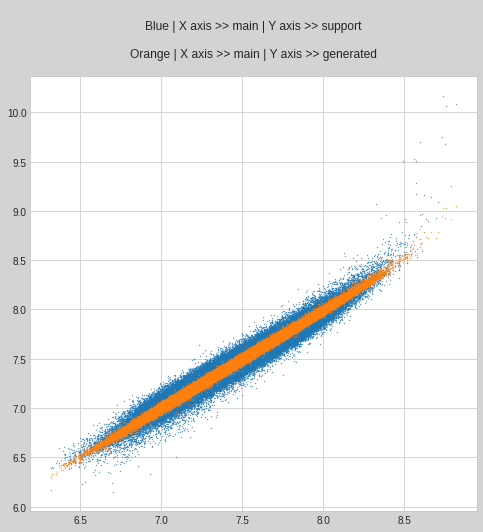

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456835
std,144169.245904,0.276144
min,0.000000,6.291517
25%,125316.750000,7.273246
50%,249997.000000,7.453902
75%,374649.750000,7.636799
max,499995.000000,9.051080


In [ ]:
print('sub1(Last Support)    | Score: 0.84251')

a = pd.read_csv(dfk.iloc[0, 2])

f = pd.read_csv(dfk.iloc[5, 2])

drawing1(f, a, sub1)

sub1.describe()

In [ ]:
support = sub1
    
for k in range (6, 14):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.50)
    
sub2 = support 

sub2(Last Support)    | Score: 0.84211


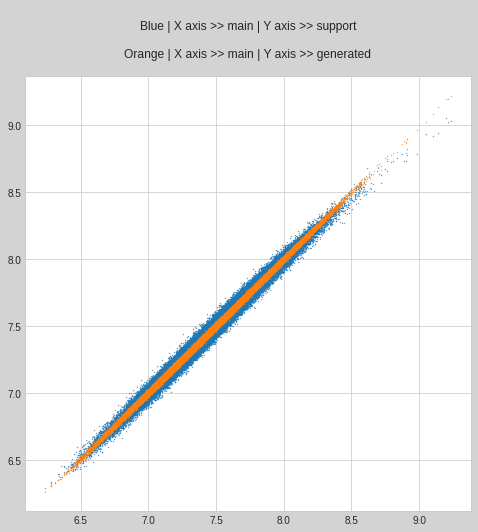

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456343
std,144169.245904,0.274725
min,0.000000,6.263415
25%,125316.750000,7.275060
50%,249997.000000,7.452287
75%,374649.750000,7.632756
max,499995.000000,9.214550


In [ ]:
print('sub2(Last Support)    | Score: 0.84211')

n = pd.read_csv(dfk.iloc[13, 2])

drawing1(n, sub1, sub2)

sub2.describe()

In [ ]:
support = sub2
    
for k in range (14, 21):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.40)
    
sub3 = support 

In [ ]:
main = pd.read_csv(dfk.iloc[21, 2])

sub4 = generate(main, sub3, 0.60)

sub4    | Score: 0.84191


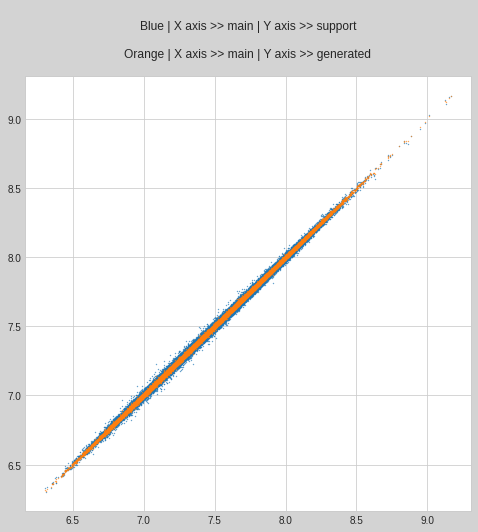

,id,target
count,200000.000000,200000.000000
mean,249970.884580,7.456373
std,144169.245904,0.275501
min,0.000000,6.309096
25%,125316.750000,7.274139
50%,249997.000000,7.453197
75%,374649.750000,7.634124
max,499995.000000,9.164328


In [ ]:
print('sub4    | Score: 0.84191')

drawing1(main, sub3, sub4)

sub4.describe()

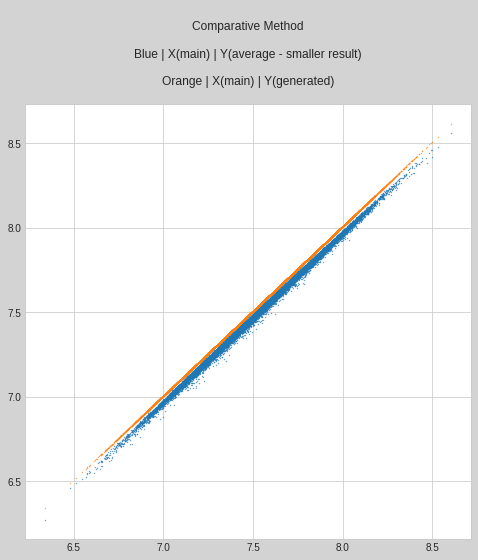

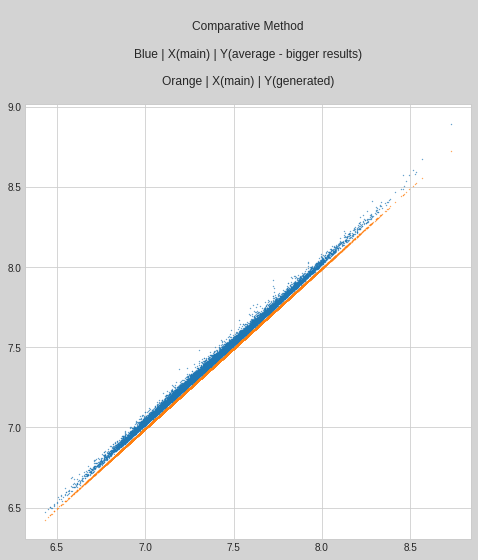

In [ ]:
sub5 = comparison(sub4, 16, 1.000, 0.9990)

In [ ]:
sub5.to_csv("kaggle_ensemble_v24.csv", index = False)
!cp kaggle_ensemble_v24.csv "drive/My Drive/"